In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [4]:
#Shape of the data set
claimants.shape

(1340, 6)

In [5]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [6]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [8]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [9]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [11]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [12]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [13]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [14]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [18]:
((381+395)/(381+197+123+395))*100

N = 381+197+123+395
tp = 381
fp = 197
fn = 123
tn = 395
accuracy = ( tn + tp) / N
accuracy

sens = tp  / (tp + fn)
spec = tn / (tn + tp)




In [13]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

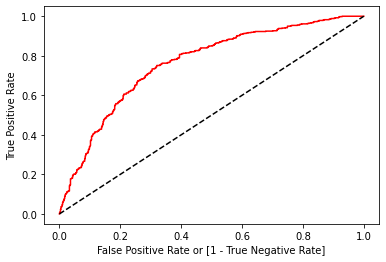

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [ ]:
auc

In [15]:
import statsmodels.api as sm
import pandas as pd
import os

df = pd.read_csv('predictive_maintenance.csv')


In [18]:
df.failure.unique()

array([0, 1], dtype=int64)

In [19]:
df[:4]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0


In [20]:
x = df[['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7']]
y = df['failure']

x1 = sm.add_constant(x)
logit = sm.Logit(y,x1)
result = logit.fit()
(result.summary2(x))


Optimization terminated successfully.
         Current function value: 0.006420
         Iterations 12


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Results: Logit
=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================
Model:              Logit                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Pseudo R-squared: 0.066     
Dependent Variable: metric1  metric2  metric3  metric4  metric5  metric6  metric7
0       215630672       56        0       52        6   407438        0
1        61370680        0        3        0        6   403174        0
2       173295968        0        0        0       12   237394        0
3        79694024        0        0        0        6   410186        0
4       135970480        0        0        0       15   313173        0
...           ...      ...      ...      ...      ...      ...      ...
124489   18310224        0        0        0       10   353705        8
124490  172556680       96      107        4       11   332792        0
124491   19029120     4832        0        0       11   350410        0
124492  226953408        0        0        0       12   358980        0
124493   17572840        0        0        0       10   351431        0

[124494 rows x 7 columns] AIC:              1614.4042 
Date:               2022-10-28 11:00                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [21]:
df.describe()
df['failure'].unique()
df['failure'].value_counts()

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = df[['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7']]
y = df['failure'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)
len(x_train),len(x_test),len(y_train),len(y_test)

(93370, 31124, 93370, 31124)

In [22]:
Lreg = LogisticRegression()
Lreg.fit(x_train,y_train.ravel())

y_predict = Lreg.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
#checking accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

score = accuracy_score(y_test,y_predict)
score


0.9993252795270531

In [24]:
confusion_matrix(y_test,y_predict)



array([[31103,     0],
       [   21,     0]], dtype=int64)

In [25]:
tn,fp,fn,tp = confusion_matrix(y_test,y_predict).ravel()
tn,fp,fn,tp



(31103, 0, 21, 0)

In [27]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31103
           1       0.00      0.00      0.00        21

    accuracy                           1.00     31124
   macro avg       0.50      0.50      0.50     31124
weighted avg       1.00      1.00      1.00     31124



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
Accuracy = (tp+tn) / (tp+tn+fp+fn)
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

Accuracy
specificity
sensitivity

0.0

In [34]:
Lreg = LogisticRegression()
Lreg.fit(x_train,y_train.ravel())

y_predict = Lreg.predict(x_test)
y_predict

y_predict_train = Lreg.predict(x_train)
y_predict_train

y_prob_train = Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

y_prob = Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)

array([[7.71048492e-03, 3.65354440e-05, 1.39202274e-03, ...,
        1.96670558e-04, 3.05266927e-07, 1.40744904e-05]])

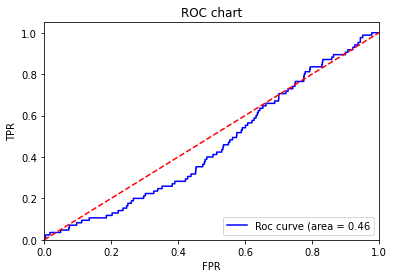

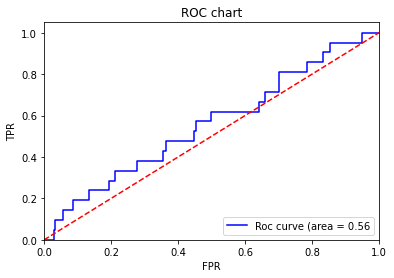

In [37]:
# train Data

log_roc_auc = roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresold1 = roc_curve(y_train,y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

plt.figure()
plt.plot(fpr1,tpr1,color='blue',label = "Roc curve (area = %0.2f" %roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC chart')
plt.legend(loc="lower right")
plt.show()

# test data

log_roc_auc = roc_auc_score(y_test,y_predict)
fpr,tpr,thresold = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='blue',label = "Roc curve (area = %0.2f" %roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC chart')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1,-1),threshold=0.3)[0]

y_predict_class = y_predict_class1.astype(int)
confusion_matrix2 = confusion_matrix(y_test,y_predict_class)
# classification_report(y_test,y_predict_class)
confusion_matrix2

array([[30965,   138],
       [   21,     0]], dtype=int64)